In [1]:
# import all possible packages useful for multiple linear regression
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
plt.rc("font", size = 14)
%matplotlib inline
import seaborn as sns
from scipy import stats
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import statsmodels.api as sm
import statsmodels.formula.api as smf 
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.stats.multicomp as multi
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import data set from hard drive
food_df = pd.read_csv(r"C:\Users\mlaws\OneDrive - Western Governors University\Documents\WGU\D214\world_food_waste.csv", skiprows=0, delimiter=",")

In [3]:
# View the # of rows/columns
food_df.shape

(19329, 18)

In [4]:
# View data types and null counts
food_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19329 entries, 0 to 19328
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   m49_code                  19329 non-null  int64  
 1   country                   19329 non-null  object 
 2   region                    455 non-null    object 
 3   cpc_code                  19329 non-null  float64
 4   commodity                 19329 non-null  object 
 5   year                      19329 non-null  int64  
 6   loss_percentage           19329 non-null  float64
 7   loss_percentage_original  19329 non-null  object 
 8   loss_quantity             89 non-null     object 
 9   activity                  18928 non-null  object 
 10  food_supply_stage         19309 non-null  object 
 11  treatment                 476 non-null    object 
 12  cause_of_loss             291 non-null    object 
 13  sample_size               402 non-null    object 
 14  method

In [5]:
#  view data
food_df.head()

,m49_code,country,region,cpc_code,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity,food_supply_stage,treatment,cause_of_loss,sample_size,method_data_collection,reference,url,notes
0,108,Burundi,NaN,111.0,Wheat,2020,3.50,3.5,NaN,"Shelling, Threshing",Farm,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
1,108,Burundi,NaN,111.0,Wheat,2020,4.87,4.87,NaN,Storage,Farm,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
2,108,Burundi,NaN,111.0,Wheat,2020,2.50,2.5,NaN,Transportation,Farm,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
3,108,Burundi,NaN,111.0,Wheat,2020,4.43,4.43,NaN,"Drying, Harvesting",Harvest,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN
4,108,Burundi,NaN,112.0,Maize (corn),2020,4.00,4,NaN,Drying,Farm,NaN,NaN,NaN,Modelled Estimates,NaN,https://www.aphlis.net/en/page/20/data-tables#...,NaN


In [6]:
data = food_df[['food_supply_stage','loss_percentage']]

In [7]:
data=data.dropna()

In [8]:
data['food_supply_stage'].unique()

array(['Farm', 'Harvest', 'Storage', 'Processing', 'Whole supply chain',
       'Retail', 'Trader', 'Wholesale', 'Post-harvest', 'Food Services',
       'Transport', 'Pre-harvest', 'Households', 'Distribution', 'Market',
       'Stacking'], dtype=object)

In [9]:
data['food_supply_stage'].value_counts()

Farm                  11755
Harvest                3439
Storage                2054
Transport              1703
Whole supply chain      161
Processing               86
Post-harvest             29
Wholesale                28
Retail                   23
Households               10
Trader                    8
Distribution              4
Food Services             4
Market                    2
Pre-harvest               2
Stacking                  1
Name: food_supply_stage, dtype: int64

In [10]:
data['food_supply_stage'] = data['food_supply_stage'].replace('Storage','Retail')
data['food_supply_stage'] = data['food_supply_stage'].replace('Processing','Retail')
data['food_supply_stage'] = data['food_supply_stage'].replace('Whole supply chain','Retail')
data['food_supply_stage'] = data['food_supply_stage'].replace('Trader','Retail')
data['food_supply_stage'] = data['food_supply_stage'].replace('Wholesale','Retail')
data['food_supply_stage'] = data['food_supply_stage'].replace('Post-harvest','Retail')
data['food_supply_stage'] = data['food_supply_stage'].replace('Households','Retail')
data['food_supply_stage'] = data['food_supply_stage'].replace('Distribution','Retail')
data['food_supply_stage'] = data['food_supply_stage'].replace('Food Services','Retail')
data['food_supply_stage'] = data['food_supply_stage'].replace('Market','Retail')
data['food_supply_stage'] = data['food_supply_stage'].replace('Food_Services','Retail')
data['food_supply_stage'] = data['food_supply_stage'].replace('Transport','Retail')
data['food_supply_stage'] = data['food_supply_stage'].replace('Pre-harvest','Farm')
data['food_supply_stage'] = data['food_supply_stage'].replace('Stacking','Retail')

In [11]:
data['food_supply_stage'].unique()

array(['Farm', 'Harvest', 'Retail'], dtype=object)

In [12]:
data['food_supply_stage'].value_counts()

Farm       11757
Retail      4113
Harvest     3439
Name: food_supply_stage, dtype: int64

In [13]:
data = data.groupby('food_supply_stage').apply(lambda x: x.sample(3400)).reset_index(drop=True)

In [14]:
data['food_supply_stage'].value_counts()

Farm       3400
Harvest    3400
Retail     3400
Name: food_supply_stage, dtype: int64

In [15]:
data.head()

,food_supply_stage,loss_percentage
0,Farm,0.45
1,Farm,2.17
2,Farm,4.28
3,Farm,5.43
4,Farm,3.72


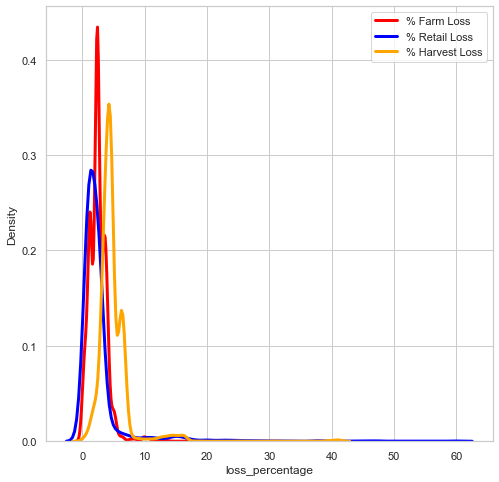

In [16]:
# Density plot to see distribution of loss percentage
farm = pd.DataFrame(data[data['food_supply_stage']=='Farm'])
harvest = pd.DataFrame(data[data['food_supply_stage']=='Harvest'])
retail = pd.DataFrame(data[data['food_supply_stage']=='Retail'])
plt.rcParams["figure.figsize"] = (8,8)
sns.distplot(farm['loss_percentage'], hist=False, kde=True, label = '% Farm Loss',
            kde_kws = {'linewidth': 3}, color='red',
             hist_kws={'edgecolor':'black'})
# Density plot to see distribution of loss percentage
plt.rcParams["figure.figsize"] = (8,8)
sns.distplot(retail['loss_percentage'], hist=False, kde=True, label='% Retail Loss',
            kde_kws = {'linewidth': 3}, color='blue',
             hist_kws={'edgecolor':'black'})
# Density plot to see distribution of loss percentage
plt.rcParams["figure.figsize"] = (8,8)
sns.distplot(harvest['loss_percentage'], hist=False, kde=True, label='% Harvest Loss',
            kde_kws = {'linewidth': 3}, color='orange',
             hist_kws={'edgecolor':'black'})
plt.legend()

In [17]:
# reduce data to create a normal distribution of loss %
df = pd.DataFrame(data[data['loss_percentage'] < 8])

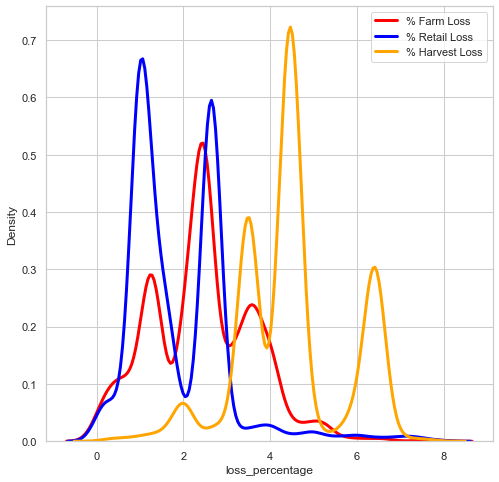

In [18]:
# Density plot to see distribution of loss percentage
farm2 = pd.DataFrame(df[df['food_supply_stage']=='Farm'])
harvest2 = pd.DataFrame(df[df['food_supply_stage']=='Harvest'])
retail2 = pd.DataFrame(df[df['food_supply_stage']=='Retail'])
plt.rcParams["figure.figsize"] = (8,8)
sns.distplot(farm2['loss_percentage'], hist=False, kde=True, label = '% Farm Loss',
            kde_kws = {'linewidth': 3}, color='red',
             hist_kws={'edgecolor':'black'})
# Density plot to see distribution of loss percentage
plt.rcParams["figure.figsize"] = (8,8)
sns.distplot(retail2['loss_percentage'], hist=False, kde=True, label='% Retail Loss',
            kde_kws = {'linewidth': 3}, color='blue',
             hist_kws={'edgecolor':'black'})
# Density plot to see distribution of loss percentage
plt.rcParams["figure.figsize"] = (8,8)
sns.distplot(harvest2['loss_percentage'], hist=False, kde=True, label='% Harvest Loss',
            kde_kws = {'linewidth': 3}, color='orange',
             hist_kws={'edgecolor':'black'})

plt.legend()

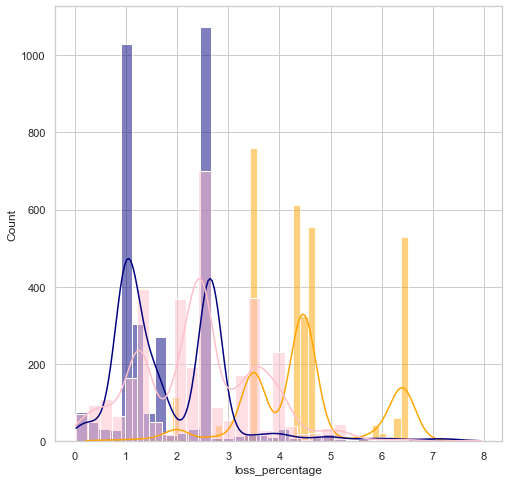

In [19]:
# Visualize distribution of 'loss_percentage'
plt.rcParams["figure.figsize"] = (8,8)

sns.histplot(data=harvest2, x='loss_percentage', kde=True, color='orange', label='% Harvest Loss')
sns.histplot(data=retail2, x='loss_percentage', kde=True, color='navy', label='% ')
sns.histplot(data=farm2, x='loss_percentage', kde=True, color='pink')
plt.show()

In [20]:
#Check how many tuples are in each category
df['food_supply_stage'].value_counts()

Farm       3365
Harvest    3255
Retail     3225
Name: food_supply_stage, dtype: int64

In [21]:
# Performing two-way ANOVA
model = smf.ols('loss_percentage ~ food_supply_stage', data=df).fit()
aov_table = anova_lm(model, typ=2)
print(aov_table)

                         sum_sq      df           F  PR(>F)
food_supply_stage  12102.187175     2.0  4293.92311     0.0
Residual           13869.569056  9842.0         NaN     NaN


In [22]:
# Which stage is significantly different using Tukey method
mcStage = multi.MultiComparison(df['loss_percentage'], df['food_supply_stage'])
results_stage = mcStage.tukeyhsd()
print(results_stage.summary())

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj  lower   upper  reject
-----------------------------------------------------
   Farm Harvest   2.0351 0.001  1.9667  2.1035   True
   Farm  Retail  -0.5553 0.001 -0.6239 -0.4867   True
Harvest  Retail  -2.5904 0.001 -2.6595 -2.5212   True
-----------------------------------------------------


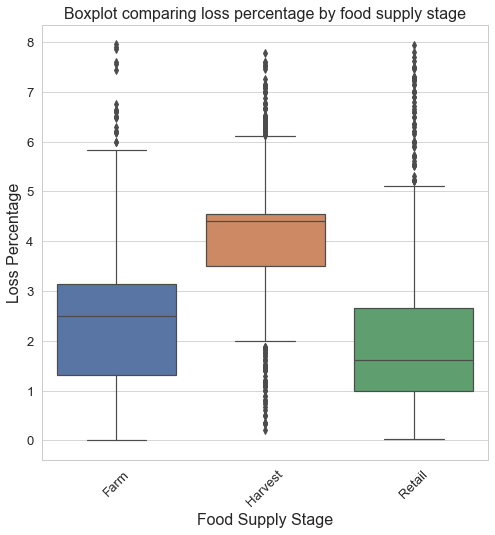

In [23]:
# Visualize the loss % of the 3 categories 
sns.set_context("paper",font_scale=1.5, rc={"font.size":16, "axes.titlesize":16,"axes.labelsize":16})
plt.title('Boxplot comparing loss percentage by food supply stage')
sns.boxplot('food_supply_stage', y='loss_percentage', data=df)
plt.xlabel('Food Supply Stage')
plt.ylabel('Loss Percentage')
plt.xticks(rotation=45)
plt.show()

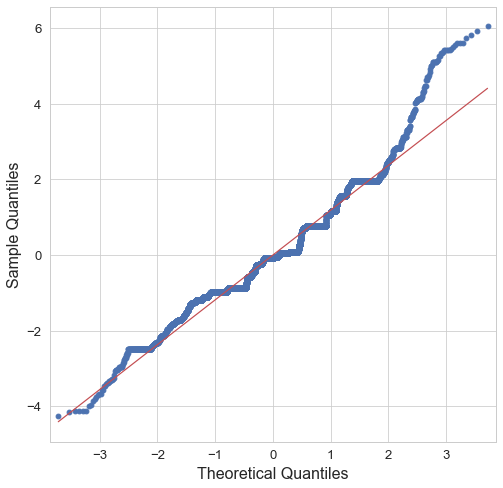

In [24]:
# ANOVA assumes normality. Q-Q plot diplays normality of data
residuals = model.resid
fig = sm.qqplot(residuals, line='s')
plt.show()

In [25]:
# Check for the equality of variances of the treatments using levene test
# The p-value refers to the significance of variation, so a p-value > .05 means variance is equal and ANOVA model is ok
farm3 = df['loss_percentage'][df['food_supply_stage']=='Farm']
harvest3 = df['loss_percentage'][df['food_supply_stage']=='Harvest']
retail3 = df['loss_percentage'][df['food_supply_stage']=='Retail']
(test_statistic, p_value) = stats.levene(farm3,harvest3, retail3)
print("The test statistic is: ", round(test_statistic,5))
print("The P-value is: ", round(p_value,5))

The test statistic is:  2.88057
The P-value is:  0.05615


In [26]:
#Export prepared data
df.to_csv(r"C:\Users\mlaws\OneDrive - Western Governors University\Documents\WGU\D214\WFW_clean.csv")